<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
import os
from datetime import datetime, time, date, timezone, timedelta

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [4]:
raw = pd.read_csv('manhattan.csv')
raw.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [14]:
x = raw[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood']]

y = raw['rent']
x.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho


In [16]:
x_ = pd.get_dummies(x, columns = ['neighborhood'], prefix = ['neighbor'])
x_.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,...,neighbor_Nolita,neighbor_Roosevelt Island,neighbor_Soho,neighbor_Stuyvesant Town/PCV,neighbor_Tribeca,neighbor_Upper East Side,neighbor_Upper West Side,neighbor_Washington Heights,neighbor_West Harlem,neighbor_West Village
0,0.0,1,480,9,2.0,17,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,2,2000,4,1.0,96,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,4800,3,4.0,136,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [26]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

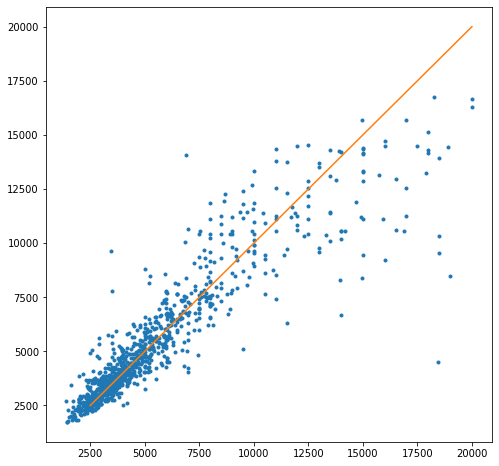

In [28]:
plt.figure(figsize = [8, 8])
plt.plot(y_te, pred_rf, '.')
plt.plot([2500,20000], [2500,20000])

<BarContainer object of 46 artists>

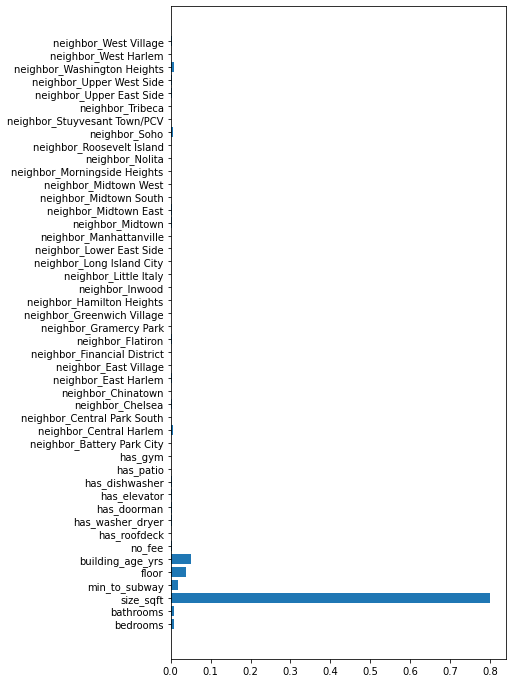

In [42]:
plt.figure(figsize = [6, 12])
plt.barh(x_.columns, pd.Series(fit_rf.feature_importances_, index = x_.columns))

In [45]:
x_tr

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,...,neighbor_Nolita,neighbor_Roosevelt Island,neighbor_Soho,neighbor_Stuyvesant Town/PCV,neighbor_Tribeca,neighbor_Upper East Side,neighbor_Upper West Side,neighbor_Washington Heights,neighbor_West Harlem,neighbor_West Village
2870,1.0,1,600,8,1.0,96,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1411,0.0,1,557,4,7.0,47,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2267,2.0,1,1000,6,3.0,106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3513,1.0,1,704,2,17.0,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,1.0,1,650,3,3.0,76,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1.0,1,942,1,4.0,25,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1283,1.0,1,837,5,4.0,17,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
867,2.0,1,750,3,2.0,126,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2971,1.0,1,724,10,21.0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
scaler = RobustScaler()
tr_fit = scaler.fit_transform(np.array(x_tr['size_sqft']).reshape(-1, 1))
te_fit = scaler.transform(np.array(x_te['size_sqft']).reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


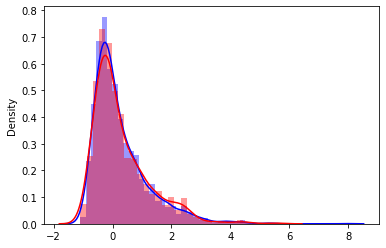

In [58]:
sns.distplot(tr_fit, color = 'blue'),
sns.distplot(te_fit, color = 'red')

In [59]:
x_tr['size_sqft'] = tr_fit
x_te['size_sqft'] = te_fit

In [65]:
fit_rf_std = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf_std = fit_rf_std.predict(x_te)

In [66]:
mean_squared_error(y_te, pred_rf),mean_squared_error(y_te, pred_rf_std)

(1917415.3585553588, 1893443.833071015)

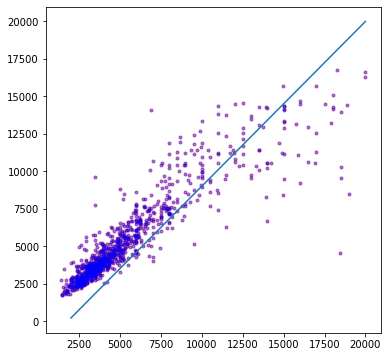

In [69]:
plt.figure(figsize = [6,6])
plt.plot(y_te, pred_rf, '.', color = 'red', alpha = .3)
plt.plot(y_te, pred_rf, '.', color = 'blue', alpha = .3)
plt.plot([2000, 20000],[200, 20000])

<BarContainer object of 46 artists>

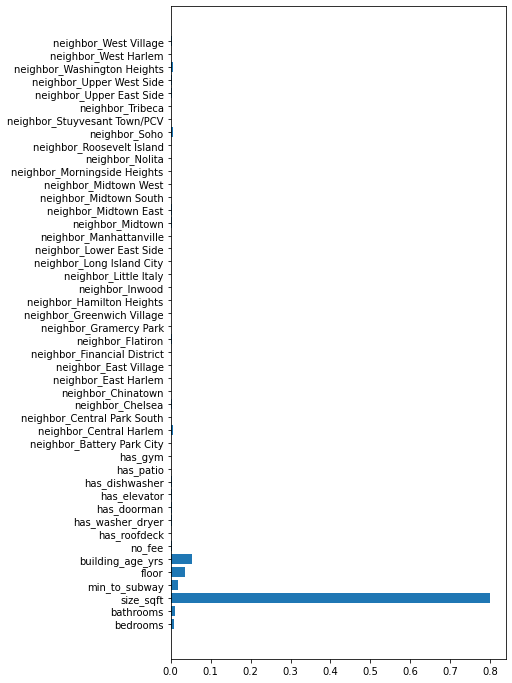

In [72]:
plt.figure(figsize = [6,12])
plt.barh(x_.columns, fit_rf_std.feature_importances_)

# customer analysis

In [73]:
os.listdir()

['.config', 'retail_data_transactions.csv', 'manhattan.csv', 'sample_data']

In [74]:
raw = pd.read_csv('retail_data_transactions.csv')
raw.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [75]:
raw.shape

(125000, 3)

In [76]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [77]:
raw.columns = ['id', 'date', 'amt']

In [78]:
raw['date'] = pd.to_datetime(raw['date'])
raw.head()

,id,date,amt
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [81]:
raw['month'] = raw['date'].to_numpy().astype('datetime64[M]')
raw.head()

,id,date,amt,month
0,CS5295,2013-02-11,35,2013-02-01
1,CS4768,2015-03-15,39,2015-03-01
2,CS2122,2013-02-26,52,2013-02-01
3,CS1217,2011-11-16,99,2011-11-01
4,CS1850,2013-11-20,78,2013-11-01


In [84]:
raw = raw.sort_values(['id', 'date'], ascending = [0, 1])
raw.head()

,id,date,amt,month
103506,CS9000,2011-09-04,16,2011-09-01
103206,CS9000,2011-10-23,23,2011-10-01
110180,CS9000,2012-05-12,53,2012-05-01
106580,CS9000,2012-05-23,77,2012-05-01
123448,CS9000,2012-06-01,37,2012-06-01


In [87]:
list_pu = raw.groupby(['id', 'month']).first().reset_index()
list_npu = raw.groupby(['id']).first().reset_index()

In [117]:
list_month = list_pu['month'].sort_values().unique()

In [118]:
for mon in list_month :
  #mon = list_month[0]
  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month']).size().reset_index()
  temp = temp.assign(month_num = [f'M{a:02d}' for a in temp['month'].rank().astype(int)])
  temp.columns = ['month', 'cnt', 'month_num']
  temp = pd.pivot_table(temp[['month_num', 'cnt']].assign(month = mon), 
                index = 'month', columns = 'month_num', values = 'cnt' ).reset_index()
  temp.columns.name = 0

  if mon == list_month[0] :

    res = temp

  else : 

    res = pd.concat([res, temp], axis = 0)


In [120]:
res.head()

,month,M01,M02,M03,M04,M05,M06,M07,M08,M09,...,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47
0,2011-05-01,1344.0,426.0,460.0,491.0,448.0,489.0,403.0,458.0,457.0,...,457.0,477.0,441.0,438.0,465.0,433.0,425.0,460.0,411.0,262.0
0,2011-06-01,1804.0,580.0,612.0,580.0,607.0,563.0,586.0,607.0,567.0,...,592.0,623.0,561.0,579.0,586.0,606.0,577.0,520.0,325.0,NaN
0,2011-07-01,1215.0,416.0,413.0,425.0,387.0,424.0,390.0,387.0,397.0,...,403.0,391.0,397.0,406.0,381.0,433.0,374.0,208.0,NaN,NaN
0,2011-08-01,863.0,265.0,280.0,259.0,284.0,293.0,282.0,277.0,264.0,...,256.0,276.0,292.0,308.0,272.0,289.0,181.0,NaN,NaN,NaN
0,2011-09-01,467.0,133.0,139.0,169.0,168.0,142.0,150.0,150.0,144.0,...,171.0,150.0,147.0,144.0,133.0,97.0,NaN,NaN,NaN,NaN


In [126]:
res2 = pd.melt(res, id_vars = 'month', var_name = 'num', value_name = 'pu').sort_values(['month', 'num'])
res2.head()

,month,num,pu
0,2011-05-01,M01,1344.0
28,2011-05-01,M02,426.0
56,2011-05-01,M03,460.0
84,2011-05-01,M04,491.0
112,2011-05-01,M05,448.0


In [128]:
res2 = res2.assign(ratio = res2.groupby(['month'])['pu'].apply(lambda x : x/max(x)))
res2.head()

,month,num,pu,ratio
0,2011-05-01,M01,1344.0,1.000000
28,2011-05-01,M02,426.0,0.316964
56,2011-05-01,M03,460.0,0.342262
84,2011-05-01,M04,491.0,0.365327
112,2011-05-01,M05,448.0,0.333333


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 43 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


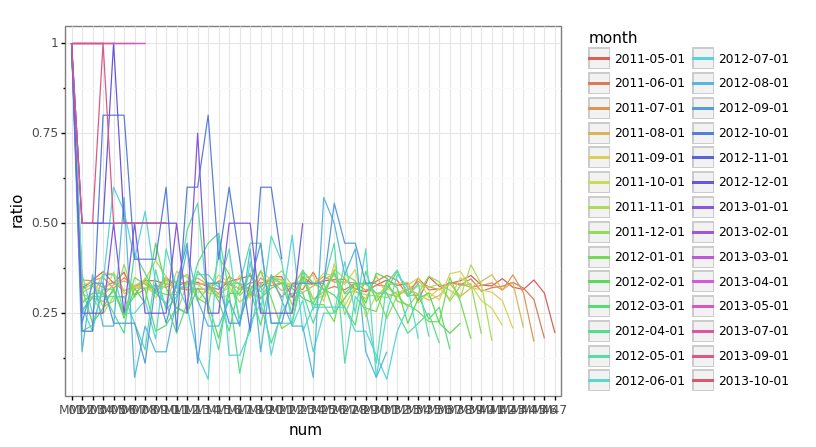

<ggplot: (8783674309017)>

In [130]:
(
    ggplot(res2.assign(month = res2['month'].astype(str)), aes('num', 'ratio', color = 'month', group = 'month')) +
    gg.geom_line() +
    gg.theme_bw()
)